In [0]:
import os
import numpy as np
import torch
import time
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.autograd import Variable
from pathlib import Path
from tqdm import tqdm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install tensorflow==1.15 scipy==1.0

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 50.0MB 66kB/s 
     |████████████████████████████████| 3.8MB 39.1MB/s 
     |████████████████████████████████| 512kB 59.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=e3f14ee04993342fbb453554eaa2e70f17f2231a7d6bc1aed0869ee4fde79912
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: seaborn 0.10.0 has requirement scipy>=1.0.1, but you'll have scipy 1.0.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: cvxpy 1.0.31 has requirement scipy>=1.1.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorbo

In [4]:
!pip install dominate

In [5]:
!ls

drive  sample_data


In [6]:
%cd drive/My\ Drive/do-as-i-do/

/content/drive/My Drive/do-as-i-do


In [7]:
%pwd

'/content/drive/My Drive/do-as-i-do'

In [0]:
import config.train_opt as opt

In [0]:
pix2pixhd_dir = Path('./src/pix2pixHD/')
import sys
sys.path.append(str(pix2pixhd_dir))
%load_ext autoreload
%autoreload 2

In [0]:
from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util
from util.visualizer import Visualizer

In [0]:
iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')

In [0]:
opt.dataroot = "./dataset_test"
opt.label_nc = 0
opt.fp16 = False
# Create new folder for testing
opt.name="Pose_Game_test"
opt.load_pretrain = "./checkpoints/Pose_Game/"
opt.checkpoints_dir = "./checkpoints/"

In [14]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
print('Training images = ',dataset_size)
    
start_epoch, epoch_iter = 1, 0
total_steps = (start_epoch-1) * dataset_size + epoch_iter
display_delta = total_steps % opt.display_freq
print_delta = total_steps % opt.print_freq
save_delta = total_steps % opt.save_latest_freq

CustomDatasetDataLoader
dataset [AlignedDataset] was created
Training images =  179


# Visulaize Poses and their images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

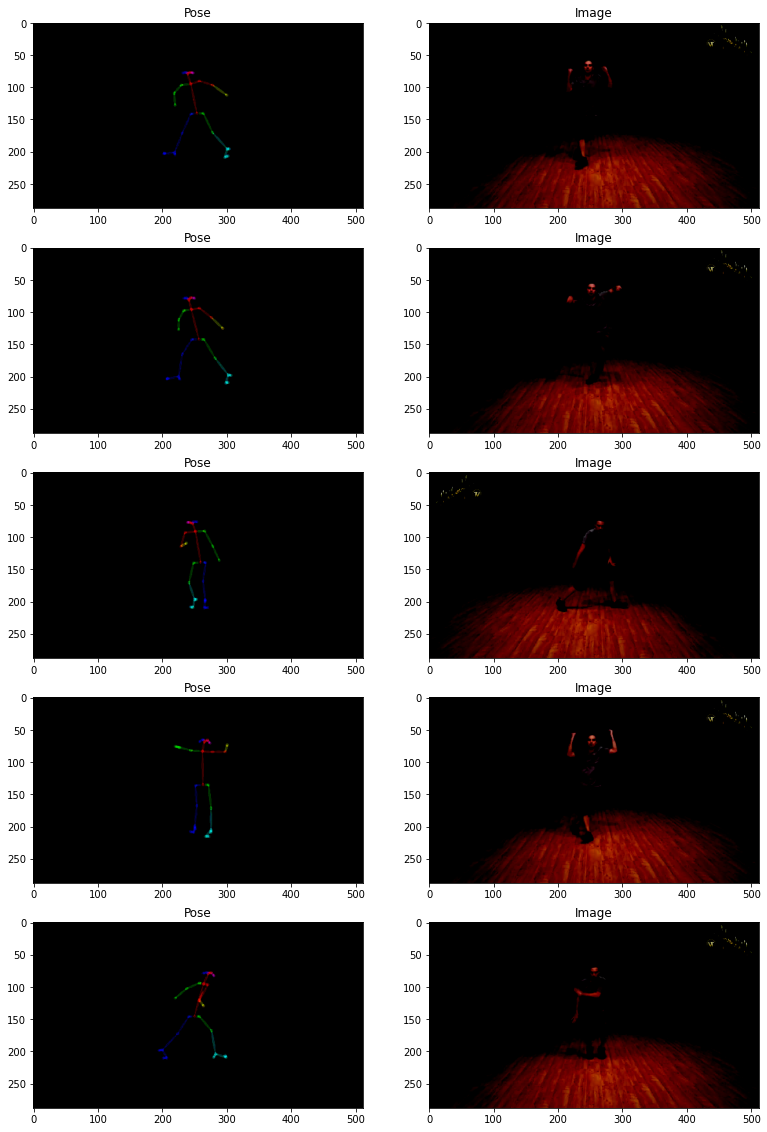

In [15]:
fig = plt.figure(figsize = [13,20])
for i,temp in enumerate(dataset):
    #Pose
    plt.subplot(5,2,i*2+1)
    plt.title("Pose")
    plt.imshow(temp['label'][0].permute(1,2,0))
    #Image
    plt.subplot(5,2,(i+1)*2)
    plt.title("Image")
    plt.imshow(temp['image'][0].permute(1,2,0))

    if i==4:
        break
plt.show()

In [0]:
opt.isTrain= True
opt.use_encoded_image = True

In [17]:
model = create_model(opt)
visualizer = Visualizer(opt)

GlobalGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (14): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affi

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth



create web directory ./checkpoints/Pose_Game_test/web...


In [18]:
!pip install datetime

     |████████████████████████████████| 61kB 4.4MB/s 
     |████████████████████████████████| 235kB 14.7MB/s 


In [19]:
import datetime
start_time = datetime.datetime.now()

epoch = 1
i = 0
for data in tqdm(dataset):
    iter_start_time = time.time()
    total_steps += 1
    epoch_iter += 1

    # Forward Pass 
    losses, generated = model(Variable(data['label']), Variable(data['inst']), 
        Variable(data['image']), Variable(data['feat']), infer=True)

    # sum per device losses
    losses = [ torch.mean(x) if not isinstance(x, int) else x for x in losses ]
    loss_dict = dict(zip(model.module.loss_names, losses))

    # calculate final loss 
    loss_D = (loss_dict['D_fake'] + loss_dict['D_real']) * 0.5
    loss_G = loss_dict['G_GAN'] + loss_dict.get('G_GAN_Feat',0) + loss_dict.get('G_VGG',0)


    ## Display results and errors 
    # print out errors
    errors = {k: v.item() if not isinstance(v, int) else v for k, v in loss_dict.items()}
    t = (time.time() - iter_start_time) / opt.batchSize
    visualizer.print_current_errors(epoch, epoch_iter, errors, t)
    visualizer.plot_current_errors(errors, total_steps)

    # display output images
    visuals = OrderedDict([('Input_label', util.tensor2label(data['label'][0], opt.label_nc)),
                           ('Synthesized_image', util.tensor2im(generated.data[0])),
                           ('Real_image', util.tensor2im(data['image'][0]))])
    visualizer.display_current_results(visuals, i, total_steps)

    # save error             
    np.savetxt(iter_path, (epoch, epoch_iter), delimiter=',', fmt='%d')
    i+=1


torch.cuda.empty_cache()

print(end='\n\n')
print('Total time elapsed = ', datetime.datetime.now() - start_time)

  0%|          | 0/179 [00:00<?, ?it/s]

(epoch: 1, iters: 1, time: 1.643) G_GAN: 0.502 G_GAN_Feat: 2.696 G_VGG: 2.311 D_real: 0.256 D_fake: 0.507 



  1%|          | 2/179 [00:03<07:05,  2.40s/it]

(epoch: 1, iters: 2, time: 0.147) G_GAN: 0.492 G_GAN_Feat: 1.697 G_VGG: 2.207 D_real: 0.468 D_fake: 0.515 


  2%|▏         | 3/179 [00:03<05:09,  1.76s/it]

(epoch: 1, iters: 3, time: 0.143) G_GAN: 0.521 G_GAN_Feat: 1.416 G_VGG: 1.628 D_real: 0.550 D_fake: 0.490 


  2%|▏         | 4/179 [00:04<03:46,  1.30s/it]

(epoch: 1, iters: 4, time: 0.142) G_GAN: 0.549 G_GAN_Feat: 1.368 G_VGG: 1.885 D_real: 0.502 D_fake: 0.465 
(epoch: 1, iters: 5, time: 0.142) G_GAN: 0.548 G_GAN_Feat: 1.393 G_VGG: 1.992 D_real: 0.481 D_fake: 0.467 


  3%|▎         | 6/179 [00:04<02:15,  1.27it/s]

(epoch: 1, iters: 6, time: 0.141) G_GAN: 0.495 G_GAN_Feat: 1.413 G_VGG: 1.890 D_real: 0.518 D_fake: 0.513 


  4%|▍         | 7/179 [00:04<01:47,  1.59it/s]

(epoch: 1, iters: 7, time: 0.141) G_GAN: 0.530 G_GAN_Feat: 1.544 G_VGG: 2.041 D_real: 0.500 D_fake: 0.479 
(epoch: 1, iters: 8, time: 0.141) G_GAN: 0.497 G_GAN_Feat: 1.526 G_VGG: 2.160 D_real: 0.484 D_fake: 0.512 


  5%|▌         | 9/179 [00:06<01:34,  1.80it/s]

(epoch: 1, iters: 9, time: 0.148) G_GAN: 0.526 G_GAN_Feat: 2.255 G_VGG: 2.312 D_real: 0.339 D_fake: 0.483 


  6%|▌         | 10/179 [00:06<01:27,  1.94it/s]

(epoch: 1, iters: 10, time: 0.145) G_GAN: 0.519 G_GAN_Feat: 1.306 G_VGG: 1.679 D_real: 0.467 D_fake: 0.492 
(epoch: 1, iters: 11, time: 0.142) G_GAN: 0.465 G_GAN_Feat: 1.345 G_VGG: 1.928 D_real: 0.475 D_fake: 0.548 


  7%|▋         | 12/179 [00:07<01:21,  2.04it/s]

(epoch: 1, iters: 12, time: 0.141) G_GAN: 0.535 G_GAN_Feat: 1.546 G_VGG: 2.095 D_real: 0.480 D_fake: 0.475 


  7%|▋         | 13/179 [00:07<01:09,  2.39it/s]

(epoch: 1, iters: 13, time: 0.143) G_GAN: 0.549 G_GAN_Feat: 1.335 G_VGG: 1.659 D_real: 0.489 D_fake: 0.463 
(epoch: 1, iters: 14, time: 0.140) G_GAN: 0.582 G_GAN_Feat: 1.380 G_VGG: 1.952 D_real: 0.488 D_fake: 0.439 


  8%|▊         | 15/179 [00:08<01:05,  2.51it/s]

(epoch: 1, iters: 15, time: 0.142) G_GAN: 0.511 G_GAN_Feat: 1.487 G_VGG: 1.919 D_real: 0.525 D_fake: 0.497 


  9%|▉         | 16/179 [00:08<01:03,  2.55it/s]

(epoch: 1, iters: 16, time: 0.144) G_GAN: 0.543 G_GAN_Feat: 1.412 G_VGG: 1.866 D_real: 0.508 D_fake: 0.467 
(epoch: 1, iters: 17, time: 0.142) G_GAN: 0.510 G_GAN_Feat: 1.334 G_VGG: 1.884 D_real: 0.513 D_fake: 0.499 


 10%|█         | 18/179 [00:09<01:09,  2.33it/s]

(epoch: 1, iters: 18, time: 0.141) G_GAN: 0.530 G_GAN_Feat: 1.425 G_VGG: 1.899 D_real: 0.522 D_fake: 0.481 


 11%|█         | 19/179 [00:09<00:59,  2.71it/s]

(epoch: 1, iters: 19, time: 0.142) G_GAN: 0.533 G_GAN_Feat: 1.531 G_VGG: 2.054 D_real: 0.572 D_fake: 0.477 
(epoch: 1, iters: 20, time: 0.142) G_GAN: 0.522 G_GAN_Feat: 1.477 G_VGG: 2.052 D_real: 0.548 D_fake: 0.486 


 12%|█▏        | 21/179 [00:10<01:02,  2.52it/s]

(epoch: 1, iters: 21, time: 0.141) G_GAN: 0.516 G_GAN_Feat: 1.352 G_VGG: 1.932 D_real: 0.521 D_fake: 0.491 


 12%|█▏        | 22/179 [00:11<01:04,  2.42it/s]

(epoch: 1, iters: 22, time: 0.143) G_GAN: 0.537 G_GAN_Feat: 1.371 G_VGG: 1.716 D_real: 0.533 D_fake: 0.475 
(epoch: 1, iters: 23, time: 0.141) G_GAN: 0.543 G_GAN_Feat: 1.414 G_VGG: 1.660 D_real: 0.565 D_fake: 0.471 


 13%|█▎        | 24/179 [00:12<00:58,  2.63it/s]

(epoch: 1, iters: 24, time: 0.142) G_GAN: 0.529 G_GAN_Feat: 1.355 G_VGG: 1.943 D_real: 0.520 D_fake: 0.482 


 14%|█▍        | 25/179 [00:12<00:53,  2.85it/s]

(epoch: 1, iters: 25, time: 0.141) G_GAN: 0.504 G_GAN_Feat: 1.385 G_VGG: 1.905 D_real: 0.498 D_fake: 0.504 
(epoch: 1, iters: 26, time: 0.142) G_GAN: 0.507 G_GAN_Feat: 1.573 G_VGG: 2.077 D_real: 0.498 D_fake: 0.502 


 15%|█▌        | 27/179 [00:13<00:53,  2.85it/s]

(epoch: 1, iters: 27, time: 0.142) G_GAN: 0.511 G_GAN_Feat: 1.403 G_VGG: 1.718 D_real: 0.514 D_fake: 0.498 


 16%|█▌        | 28/179 [00:13<00:47,  3.17it/s]

(epoch: 1, iters: 28, time: 0.143) G_GAN: 0.524 G_GAN_Feat: 1.456 G_VGG: 1.937 D_real: 0.471 D_fake: 0.485 
(epoch: 1, iters: 29, time: 0.144) G_GAN: 0.551 G_GAN_Feat: 1.601 G_VGG: 1.928 D_real: 0.502 D_fake: 0.465 


 17%|█▋        | 30/179 [00:14<01:13,  2.03it/s]

(epoch: 1, iters: 30, time: 0.146) G_GAN: 0.517 G_GAN_Feat: 1.352 G_VGG: 1.810 D_real: 0.500 D_fake: 0.489 


 17%|█▋        | 31/179 [00:15<01:10,  2.09it/s]

(epoch: 1, iters: 31, time: 0.144) G_GAN: 0.573 G_GAN_Feat: 1.304 G_VGG: 1.701 D_real: 0.565 D_fake: 0.448 
(epoch: 1, iters: 32, time: 0.146) G_GAN: 0.501 G_GAN_Feat: 1.354 G_VGG: 1.842 D_real: 0.515 D_fake: 0.509 


 18%|█▊        | 33/179 [00:16<01:11,  2.05it/s]

(epoch: 1, iters: 33, time: 0.143) G_GAN: 0.530 G_GAN_Feat: 1.482 G_VGG: 2.021 D_real: 0.490 D_fake: 0.478 


 19%|█▉        | 34/179 [00:16<00:59,  2.43it/s]

(epoch: 1, iters: 34, time: 0.146) G_GAN: 0.505 G_GAN_Feat: 1.425 G_VGG: 1.818 D_real: 0.484 D_fake: 0.502 
(epoch: 1, iters: 35, time: 0.145) G_GAN: 0.504 G_GAN_Feat: 1.489 G_VGG: 1.952 D_real: 0.479 D_fake: 0.504 


 20%|██        | 36/179 [00:17<01:01,  2.33it/s]

(epoch: 1, iters: 36, time: 0.145) G_GAN: 0.489 G_GAN_Feat: 1.516 G_VGG: 2.171 D_real: 0.483 D_fake: 0.519 
(epoch: 1, iters: 37, time: 0.145) G_GAN: 0.527 G_GAN_Feat: 1.283 G_VGG: 1.818 D_real: 0.524 D_fake: 0.482 


 21%|██        | 38/179 [00:18<00:57,  2.47it/s]

(epoch: 1, iters: 38, time: 0.145) G_GAN: 0.533 G_GAN_Feat: 1.741 G_VGG: 2.219 D_real: 0.487 D_fake: 0.477 


 22%|██▏       | 39/179 [00:18<01:01,  2.29it/s]

(epoch: 1, iters: 39, time: 0.145) G_GAN: 0.484 G_GAN_Feat: 1.692 G_VGG: 2.072 D_real: 0.562 D_fake: 0.525 
(epoch: 1, iters: 40, time: 0.146) G_GAN: 0.505 G_GAN_Feat: 1.282 G_VGG: 1.652 D_real: 0.495 D_fake: 0.505 


 23%|██▎       | 41/179 [00:19<00:54,  2.55it/s]

(epoch: 1, iters: 41, time: 0.144) G_GAN: 0.539 G_GAN_Feat: 1.362 G_VGG: 1.886 D_real: 0.497 D_fake: 0.473 


 23%|██▎       | 42/179 [00:19<00:49,  2.78it/s]

(epoch: 1, iters: 42, time: 0.143) G_GAN: 0.501 G_GAN_Feat: 1.571 G_VGG: 2.193 D_real: 0.469 D_fake: 0.508 
(epoch: 1, iters: 43, time: 0.145) G_GAN: 0.529 G_GAN_Feat: 1.376 G_VGG: 1.931 D_real: 0.510 D_fake: 0.483 


 25%|██▍       | 44/179 [00:20<00:56,  2.37it/s]

(epoch: 1, iters: 44, time: 0.144) G_GAN: 0.504 G_GAN_Feat: 1.610 G_VGG: 2.426 D_real: 0.486 D_fake: 0.505 


 25%|██▌       | 45/179 [00:21<01:07,  1.99it/s]

(epoch: 1, iters: 45, time: 0.145) G_GAN: 0.559 G_GAN_Feat: 1.418 G_VGG: 1.945 D_real: 0.506 D_fake: 0.457 
(epoch: 1, iters: 46, time: 0.145) G_GAN: 0.524 G_GAN_Feat: 1.523 G_VGG: 2.033 D_real: 0.489 D_fake: 0.488 


 26%|██▋       | 47/179 [00:22<01:04,  2.06it/s]

(epoch: 1, iters: 47, time: 0.143) G_GAN: 0.489 G_GAN_Feat: 1.364 G_VGG: 1.829 D_real: 0.477 D_fake: 0.519 


 27%|██▋       | 48/179 [00:22<00:53,  2.43it/s]

(epoch: 1, iters: 48, time: 0.145) G_GAN: 0.524 G_GAN_Feat: 2.057 G_VGG: 2.442 D_real: 0.446 D_fake: 0.485 


 27%|██▋       | 49/179 [00:23<00:58,  2.21it/s]

(epoch: 1, iters: 49, time: 0.146) G_GAN: 0.511 G_GAN_Feat: 1.460 G_VGG: 1.808 D_real: 0.497 D_fake: 0.499 
(epoch: 1, iters: 50, time: 0.144) G_GAN: 0.516 G_GAN_Feat: 1.200 G_VGG: 1.581 D_real: 0.531 D_fake: 0.492 


 28%|██▊       | 50/179 [00:23<00:59,  2.18it/s]

(epoch: 1, iters: 51, time: 0.148) G_GAN: 0.495 G_GAN_Feat: 1.384 G_VGG: 1.818 D_real: 0.512 D_fake: 0.513 


 29%|██▉       | 52/179 [00:24<01:02,  2.04it/s]

(epoch: 1, iters: 52, time: 0.151) G_GAN: 0.485 G_GAN_Feat: 1.493 G_VGG: 1.999 D_real: 0.568 D_fake: 0.523 


 30%|██▉       | 53/179 [00:25<00:57,  2.18it/s]

(epoch: 1, iters: 53, time: 0.147) G_GAN: 0.520 G_GAN_Feat: 1.511 G_VGG: 2.192 D_real: 0.477 D_fake: 0.489 
(epoch: 1, iters: 54, time: 0.146) G_GAN: 0.496 G_GAN_Feat: 1.538 G_VGG: 2.151 D_real: 0.476 D_fake: 0.514 


 31%|███       | 55/179 [00:25<00:50,  2.45it/s]

(epoch: 1, iters: 55, time: 0.146) G_GAN: 0.511 G_GAN_Feat: 1.387 G_VGG: 1.819 D_real: 0.527 D_fake: 0.497 


 31%|███▏      | 56/179 [00:26<00:47,  2.58it/s]

(epoch: 1, iters: 56, time: 0.144) G_GAN: 0.477 G_GAN_Feat: 1.726 G_VGG: 2.170 D_real: 0.545 D_fake: 0.532 
(epoch: 1, iters: 57, time: 0.148) G_GAN: 0.509 G_GAN_Feat: 1.393 G_VGG: 1.784 D_real: 0.538 D_fake: 0.498 


 32%|███▏      | 58/179 [00:26<00:45,  2.69it/s]

(epoch: 1, iters: 58, time: 0.145) G_GAN: 0.536 G_GAN_Feat: 1.401 G_VGG: 2.046 D_real: 0.485 D_fake: 0.475 


 33%|███▎      | 59/179 [00:27<00:43,  2.73it/s]

(epoch: 1, iters: 59, time: 0.145) G_GAN: 0.553 G_GAN_Feat: 1.652 G_VGG: 2.090 D_real: 0.492 D_fake: 0.461 
(epoch: 1, iters: 60, time: 0.145) G_GAN: 0.554 G_GAN_Feat: 2.730 G_VGG: 1.975 D_real: 0.203 D_fake: 0.461 


 34%|███▍      | 61/179 [00:28<00:44,  2.63it/s]

(epoch: 1, iters: 61, time: 0.145) G_GAN: 0.517 G_GAN_Feat: 1.517 G_VGG: 1.781 D_real: 0.515 D_fake: 0.491 
(epoch: 1, iters: 62, time: 0.145) G_GAN: 0.535 G_GAN_Feat: 1.439 G_VGG: 1.990 D_real: 0.483 D_fake: 0.475 


 35%|███▌      | 63/179 [00:29<00:46,  2.48it/s]

(epoch: 1, iters: 63, time: 0.151) G_GAN: 0.517 G_GAN_Feat: 1.127 G_VGG: 1.443 D_real: 0.502 D_fake: 0.491 


 36%|███▌      | 64/179 [00:29<00:41,  2.78it/s]

(epoch: 1, iters: 64, time: 0.145) G_GAN: 0.528 G_GAN_Feat: 1.531 G_VGG: 2.140 D_real: 0.519 D_fake: 0.483 
(epoch: 1, iters: 65, time: 0.146) G_GAN: 0.462 G_GAN_Feat: 1.524 G_VGG: 2.140 D_real: 0.458 D_fake: 0.549 


 37%|███▋      | 66/179 [00:29<00:38,  2.94it/s]

(epoch: 1, iters: 66, time: 0.147) G_GAN: 0.519 G_GAN_Feat: 1.490 G_VGG: 2.014 D_real: 0.541 D_fake: 0.491 


 37%|███▋      | 67/179 [00:30<00:50,  2.22it/s]

(epoch: 1, iters: 67, time: 0.145) G_GAN: 0.497 G_GAN_Feat: 1.389 G_VGG: 1.878 D_real: 0.507 D_fake: 0.510 
(epoch: 1, iters: 68, time: 0.148) G_GAN: 0.501 G_GAN_Feat: 1.240 G_VGG: 1.587 D_real: 0.511 D_fake: 0.508 


 39%|███▊      | 69/179 [00:31<00:51,  2.14it/s]

(epoch: 1, iters: 69, time: 0.136) G_GAN: 0.507 G_GAN_Feat: 1.433 G_VGG: 1.929 D_real: 0.509 D_fake: 0.502 


 39%|███▉      | 70/179 [00:31<00:44,  2.47it/s]

(epoch: 1, iters: 70, time: 0.146) G_GAN: 0.481 G_GAN_Feat: 1.428 G_VGG: 1.879 D_real: 0.518 D_fake: 0.529 


 40%|███▉      | 71/179 [00:32<00:53,  2.00it/s]

(epoch: 1, iters: 71, time: 0.146) G_GAN: 0.517 G_GAN_Feat: 1.575 G_VGG: 2.025 D_real: 0.478 D_fake: 0.493 


 40%|████      | 72/179 [00:32<00:45,  2.35it/s]

(epoch: 1, iters: 72, time: 0.146) G_GAN: 0.555 G_GAN_Feat: 1.344 G_VGG: 1.850 D_real: 0.481 D_fake: 0.459 


 41%|████      | 73/179 [00:33<00:57,  1.84it/s]

(epoch: 1, iters: 73, time: 0.147) G_GAN: 0.487 G_GAN_Feat: 1.513 G_VGG: 2.012 D_real: 0.497 D_fake: 0.521 


 41%|████▏     | 74/179 [00:34<00:48,  2.19it/s]

(epoch: 1, iters: 74, time: 0.153) G_GAN: 0.528 G_GAN_Feat: 1.184 G_VGG: 1.421 D_real: 0.500 D_fake: 0.481 


 42%|████▏     | 75/179 [00:34<00:45,  2.30it/s]

(epoch: 1, iters: 75, time: 0.148) G_GAN: 0.490 G_GAN_Feat: 1.571 G_VGG: 1.996 D_real: 0.465 D_fake: 0.518 


 42%|████▏     | 76/179 [00:34<00:41,  2.46it/s]

(epoch: 1, iters: 76, time: 0.148) G_GAN: 0.554 G_GAN_Feat: 1.472 G_VGG: 1.943 D_real: 0.604 D_fake: 0.461 


 43%|████▎     | 77/179 [00:35<00:44,  2.30it/s]

(epoch: 1, iters: 77, time: 0.145) G_GAN: 0.476 G_GAN_Feat: 1.418 G_VGG: 1.705 D_real: 0.555 D_fake: 0.534 


 44%|████▎     | 78/179 [00:35<00:38,  2.62it/s]

(epoch: 1, iters: 78, time: 0.148) G_GAN: 0.512 G_GAN_Feat: 1.558 G_VGG: 2.144 D_real: 0.510 D_fake: 0.497 
(epoch: 1, iters: 79, time: 0.154) G_GAN: 0.457 G_GAN_Feat: 1.365 G_VGG: 1.824 D_real: 0.468 D_fake: 0.555 


 44%|████▍     | 79/179 [00:36<01:05,  1.53it/s]

(epoch: 1, iters: 80, time: 0.147) G_GAN: 0.514 G_GAN_Feat: 1.414 G_VGG: 1.899 D_real: 0.487 D_fake: 0.495 


 45%|████▌     | 81/179 [00:37<00:49,  1.99it/s]

(epoch: 1, iters: 81, time: 0.147) G_GAN: 0.535 G_GAN_Feat: 1.515 G_VGG: 2.115 D_real: 0.497 D_fake: 0.476 
(epoch: 1, iters: 82, time: 0.148) G_GAN: 0.491 G_GAN_Feat: 1.396 G_VGG: 1.895 D_real: 0.537 D_fake: 0.519 


 46%|████▋     | 83/179 [00:38<00:39,  2.43it/s]

(epoch: 1, iters: 83, time: 0.146) G_GAN: 0.500 G_GAN_Feat: 1.299 G_VGG: 1.765 D_real: 0.514 D_fake: 0.508 


 47%|████▋     | 84/179 [00:38<00:35,  2.69it/s]

(epoch: 1, iters: 84, time: 0.148) G_GAN: 0.526 G_GAN_Feat: 1.217 G_VGG: 1.657 D_real: 0.505 D_fake: 0.483 


 47%|████▋     | 85/179 [00:39<00:40,  2.31it/s]

(epoch: 1, iters: 85, time: 0.146) G_GAN: 0.521 G_GAN_Feat: 1.278 G_VGG: 1.710 D_real: 0.525 D_fake: 0.487 


 48%|████▊     | 86/179 [00:39<00:35,  2.59it/s]

(epoch: 1, iters: 86, time: 0.150) G_GAN: 0.495 G_GAN_Feat: 1.587 G_VGG: 2.330 D_real: 0.490 D_fake: 0.514 
(epoch: 1, iters: 87, time: 0.145) G_GAN: 0.530 G_GAN_Feat: 1.429 G_VGG: 1.773 D_real: 0.497 D_fake: 0.480 


 49%|████▉     | 88/179 [00:40<00:40,  2.26it/s]

(epoch: 1, iters: 88, time: 0.146) G_GAN: 0.556 G_GAN_Feat: 1.496 G_VGG: 1.870 D_real: 0.564 D_fake: 0.460 


 50%|████▉     | 89/179 [00:40<00:37,  2.42it/s]

(epoch: 1, iters: 89, time: 0.147) G_GAN: 0.547 G_GAN_Feat: 1.237 G_VGG: 1.564 D_real: 0.550 D_fake: 0.466 
(epoch: 1, iters: 90, time: 0.146) G_GAN: 0.523 G_GAN_Feat: 1.228 G_VGG: 1.655 D_real: 0.507 D_fake: 0.484 


 50%|█████     | 90/179 [00:41<00:38,  2.31it/s]

(epoch: 1, iters: 91, time: 0.147) G_GAN: 0.489 G_GAN_Feat: 1.206 G_VGG: 1.633 D_real: 0.478 D_fake: 0.520 


 51%|█████▏    | 92/179 [00:42<00:40,  2.16it/s]

(epoch: 1, iters: 92, time: 0.149) G_GAN: 0.543 G_GAN_Feat: 1.427 G_VGG: 1.761 D_real: 0.505 D_fake: 0.469 
(epoch: 1, iters: 93, time: 0.146) G_GAN: 0.510 G_GAN_Feat: 1.367 G_VGG: 2.066 D_real: 0.526 D_fake: 0.498 


 53%|█████▎    | 94/179 [00:43<00:38,  2.23it/s]

(epoch: 1, iters: 94, time: 0.148) G_GAN: 0.523 G_GAN_Feat: 1.466 G_VGG: 1.977 D_real: 0.565 D_fake: 0.487 


 53%|█████▎    | 95/179 [00:43<00:40,  2.06it/s]

(epoch: 1, iters: 95, time: 0.148) G_GAN: 0.503 G_GAN_Feat: 1.326 G_VGG: 1.832 D_real: 0.520 D_fake: 0.505 
(epoch: 1, iters: 96, time: 0.149) G_GAN: 0.503 G_GAN_Feat: 1.480 G_VGG: 1.920 D_real: 0.510 D_fake: 0.504 


 54%|█████▍    | 97/179 [00:44<00:34,  2.41it/s]

(epoch: 1, iters: 97, time: 0.147) G_GAN: 0.545 G_GAN_Feat: 1.457 G_VGG: 1.827 D_real: 0.587 D_fake: 0.468 
(epoch: 1, iters: 98, time: 0.148) G_GAN: 0.530 G_GAN_Feat: 1.357 G_VGG: 1.977 D_real: 0.486 D_fake: 0.483 


 55%|█████▌    | 99/179 [00:45<00:32,  2.43it/s]

(epoch: 1, iters: 99, time: 0.146) G_GAN: 0.553 G_GAN_Feat: 1.603 G_VGG: 2.114 D_real: 0.502 D_fake: 0.461 


 56%|█████▌    | 100/179 [00:45<00:32,  2.41it/s]

(epoch: 1, iters: 100, time: 0.148) G_GAN: 0.509 G_GAN_Feat: 1.302 G_VGG: 1.783 D_real: 0.532 D_fake: 0.499 
(epoch: 1, iters: 101, time: 0.150) G_GAN: 0.568 G_GAN_Feat: 1.344 G_VGG: 1.965 D_real: 0.544 D_fake: 0.449 


 57%|█████▋    | 102/179 [00:46<00:34,  2.25it/s]

(epoch: 1, iters: 102, time: 0.148) G_GAN: 0.547 G_GAN_Feat: 1.209 G_VGG: 1.590 D_real: 0.510 D_fake: 0.466 
(epoch: 1, iters: 103, time: 0.149) G_GAN: 0.561 G_GAN_Feat: 1.511 G_VGG: 1.922 D_real: 0.563 D_fake: 0.455 


 58%|█████▊    | 104/179 [00:47<00:28,  2.60it/s]

(epoch: 1, iters: 104, time: 0.151) G_GAN: 0.518 G_GAN_Feat: 1.501 G_VGG: 1.902 D_real: 0.539 D_fake: 0.491 


 59%|█████▊    | 105/179 [00:47<00:26,  2.77it/s]

(epoch: 1, iters: 105, time: 0.148) G_GAN: 0.502 G_GAN_Feat: 1.351 G_VGG: 1.758 D_real: 0.520 D_fake: 0.507 
(epoch: 1, iters: 106, time: 0.148) G_GAN: 0.555 G_GAN_Feat: 1.495 G_VGG: 1.861 D_real: 0.531 D_fake: 0.461 


 60%|█████▉    | 107/179 [00:48<00:27,  2.59it/s]

(epoch: 1, iters: 107, time: 0.150) G_GAN: 0.539 G_GAN_Feat: 1.494 G_VGG: 1.957 D_real: 0.494 D_fake: 0.472 


 60%|██████    | 108/179 [00:49<00:28,  2.46it/s]

(epoch: 1, iters: 108, time: 0.149) G_GAN: 0.472 G_GAN_Feat: 1.515 G_VGG: 1.820 D_real: 0.572 D_fake: 0.538 
(epoch: 1, iters: 109, time: 0.149) G_GAN: 0.559 G_GAN_Feat: 1.576 G_VGG: 2.184 D_real: 0.483 D_fake: 0.457 


 61%|██████▏   | 110/179 [00:50<00:32,  2.15it/s]

(epoch: 1, iters: 110, time: 0.149) G_GAN: 0.504 G_GAN_Feat: 2.710 G_VGG: 1.535 D_real: 0.185 D_fake: 0.504 


 62%|██████▏   | 111/179 [00:50<00:30,  2.23it/s]

(epoch: 1, iters: 111, time: 0.150) G_GAN: 0.510 G_GAN_Feat: 1.533 G_VGG: 1.941 D_real: 0.492 D_fake: 0.498 


 63%|██████▎   | 112/179 [00:50<00:27,  2.42it/s]

(epoch: 1, iters: 112, time: 0.148) G_GAN: 0.491 G_GAN_Feat: 1.565 G_VGG: 2.100 D_real: 0.467 D_fake: 0.515 


 63%|██████▎   | 113/179 [00:51<00:26,  2.52it/s]

(epoch: 1, iters: 113, time: 0.150) G_GAN: 0.502 G_GAN_Feat: 1.525 G_VGG: 1.832 D_real: 0.572 D_fake: 0.507 
(epoch: 1, iters: 114, time: 0.151) G_GAN: 0.562 G_GAN_Feat: 1.425 G_VGG: 1.728 D_real: 0.522 D_fake: 0.454 


 64%|██████▍   | 115/179 [00:52<00:24,  2.59it/s]

(epoch: 1, iters: 115, time: 0.148) G_GAN: 0.476 G_GAN_Feat: 1.498 G_VGG: 1.946 D_real: 0.550 D_fake: 0.533 


 65%|██████▍   | 116/179 [00:52<00:22,  2.79it/s]

(epoch: 1, iters: 116, time: 0.151) G_GAN: 0.505 G_GAN_Feat: 1.416 G_VGG: 1.795 D_real: 0.478 D_fake: 0.502 
(epoch: 1, iters: 117, time: 0.148) G_GAN: 0.539 G_GAN_Feat: 2.024 G_VGG: 2.538 D_real: 0.449 D_fake: 0.476 


 65%|██████▌   | 117/179 [00:53<00:32,  1.91it/s]

(epoch: 1, iters: 118, time: 0.149) G_GAN: 0.542 G_GAN_Feat: 1.406 G_VGG: 1.791 D_real: 0.536 D_fake: 0.471 


 66%|██████▋   | 119/179 [00:54<00:27,  2.22it/s]

(epoch: 1, iters: 119, time: 0.148) G_GAN: 0.469 G_GAN_Feat: 1.381 G_VGG: 1.655 D_real: 0.515 D_fake: 0.543 
(epoch: 1, iters: 120, time: 0.151) G_GAN: 0.503 G_GAN_Feat: 1.542 G_VGG: 2.202 D_real: 0.481 D_fake: 0.505 


 68%|██████▊   | 121/179 [00:54<00:26,  2.21it/s]

(epoch: 1, iters: 121, time: 0.148) G_GAN: 0.574 G_GAN_Feat: 1.341 G_VGG: 1.807 D_real: 0.486 D_fake: 0.443 


 68%|██████▊   | 122/179 [00:55<00:23,  2.47it/s]

(epoch: 1, iters: 122, time: 0.152) G_GAN: 0.485 G_GAN_Feat: 1.332 G_VGG: 1.783 D_real: 0.505 D_fake: 0.524 
(epoch: 1, iters: 123, time: 0.149) G_GAN: 0.534 G_GAN_Feat: 1.545 G_VGG: 2.194 D_real: 0.481 D_fake: 0.478 


 69%|██████▉   | 124/179 [00:56<00:23,  2.37it/s]

(epoch: 1, iters: 124, time: 0.149) G_GAN: 0.627 G_GAN_Feat: 1.423 G_VGG: 1.903 D_real: 0.578 D_fake: 0.408 
(epoch: 1, iters: 125, time: 0.147) G_GAN: 0.561 G_GAN_Feat: 1.303 G_VGG: 1.633 D_real: 0.544 D_fake: 0.456 


 70%|███████   | 126/179 [00:57<00:24,  2.20it/s]

(epoch: 1, iters: 126, time: 0.149) G_GAN: 0.550 G_GAN_Feat: 1.444 G_VGG: 2.048 D_real: 0.558 D_fake: 0.465 


 71%|███████   | 127/179 [00:57<00:20,  2.49it/s]

(epoch: 1, iters: 127, time: 0.151) G_GAN: 0.516 G_GAN_Feat: 1.379 G_VGG: 1.888 D_real: 0.487 D_fake: 0.492 
(epoch: 1, iters: 128, time: 0.149) G_GAN: 0.479 G_GAN_Feat: 1.379 G_VGG: 1.742 D_real: 0.542 D_fake: 0.530 


 72%|███████▏  | 129/179 [00:58<00:19,  2.59it/s]

(epoch: 1, iters: 129, time: 0.149) G_GAN: 0.534 G_GAN_Feat: 1.496 G_VGG: 2.145 D_real: 0.519 D_fake: 0.475 


 73%|███████▎  | 130/179 [00:58<00:17,  2.85it/s]

(epoch: 1, iters: 130, time: 0.148) G_GAN: 0.533 G_GAN_Feat: 1.483 G_VGG: 2.005 D_real: 0.525 D_fake: 0.477 
(epoch: 1, iters: 131, time: 0.151) G_GAN: 0.536 G_GAN_Feat: 1.518 G_VGG: 2.022 D_real: 0.508 D_fake: 0.474 


 73%|███████▎  | 131/179 [00:59<00:19,  2.50it/s]

(epoch: 1, iters: 132, time: 0.147) G_GAN: 0.490 G_GAN_Feat: 1.424 G_VGG: 1.981 D_real: 0.546 D_fake: 0.518 


 74%|███████▍  | 133/179 [00:59<00:17,  2.56it/s]

(epoch: 1, iters: 133, time: 0.152) G_GAN: 0.558 G_GAN_Feat: 1.402 G_VGG: 1.801 D_real: 0.494 D_fake: 0.458 
(epoch: 1, iters: 134, time: 0.149) G_GAN: 0.489 G_GAN_Feat: 1.380 G_VGG: 1.659 D_real: 0.514 D_fake: 0.519 


 75%|███████▌  | 135/179 [01:00<00:17,  2.52it/s]

(epoch: 1, iters: 135, time: 0.148) G_GAN: 0.517 G_GAN_Feat: 1.386 G_VGG: 1.814 D_real: 0.527 D_fake: 0.491 
(epoch: 1, iters: 136, time: 0.147) G_GAN: 0.506 G_GAN_Feat: 1.516 G_VGG: 1.822 D_real: 0.493 D_fake: 0.501 


 77%|███████▋  | 137/179 [01:01<00:18,  2.27it/s]

(epoch: 1, iters: 137, time: 0.146) G_GAN: 0.532 G_GAN_Feat: 1.327 G_VGG: 1.857 D_real: 0.525 D_fake: 0.478 


 77%|███████▋  | 138/179 [01:02<00:19,  2.13it/s]

(epoch: 1, iters: 138, time: 0.146) G_GAN: 0.560 G_GAN_Feat: 1.920 G_VGG: 2.582 D_real: 0.491 D_fake: 0.456 
(epoch: 1, iters: 139, time: 0.146) G_GAN: 0.476 G_GAN_Feat: 1.405 G_VGG: 2.089 D_real: 0.479 D_fake: 0.535 


 78%|███████▊  | 140/179 [01:03<00:18,  2.16it/s]

(epoch: 1, iters: 140, time: 0.146) G_GAN: 0.502 G_GAN_Feat: 1.479 G_VGG: 2.042 D_real: 0.486 D_fake: 0.507 


 79%|███████▉  | 141/179 [01:03<00:15,  2.39it/s]

(epoch: 1, iters: 141, time: 0.149) G_GAN: 0.541 G_GAN_Feat: 1.747 G_VGG: 2.580 D_real: 0.514 D_fake: 0.473 
(epoch: 1, iters: 142, time: 0.150) G_GAN: 0.529 G_GAN_Feat: 1.539 G_VGG: 2.108 D_real: 0.540 D_fake: 0.480 


 80%|███████▉  | 143/179 [01:04<00:14,  2.56it/s]

(epoch: 1, iters: 143, time: 0.146) G_GAN: 0.530 G_GAN_Feat: 1.512 G_VGG: 1.832 D_real: 0.539 D_fake: 0.481 


 80%|████████  | 144/179 [01:04<00:12,  2.80it/s]

(epoch: 1, iters: 144, time: 0.146) G_GAN: 0.570 G_GAN_Feat: 1.519 G_VGG: 1.929 D_real: 0.571 D_fake: 0.449 
(epoch: 1, iters: 145, time: 0.146) G_GAN: 0.530 G_GAN_Feat: 1.312 G_VGG: 1.726 D_real: 0.502 D_fake: 0.480 


 81%|████████  | 145/179 [01:05<00:13,  2.58it/s]

(epoch: 1, iters: 146, time: 0.146) G_GAN: 0.565 G_GAN_Feat: 1.420 G_VGG: 1.977 D_real: 0.569 D_fake: 0.451 


 82%|████████▏ | 147/179 [01:05<00:13,  2.45it/s]

(epoch: 1, iters: 147, time: 0.145) G_GAN: 0.505 G_GAN_Feat: 1.331 G_VGG: 1.654 D_real: 0.514 D_fake: 0.504 
(epoch: 1, iters: 148, time: 0.147) G_GAN: 0.471 G_GAN_Feat: 1.577 G_VGG: 2.255 D_real: 0.517 D_fake: 0.538 


 83%|████████▎ | 149/179 [01:06<00:11,  2.60it/s]

(epoch: 1, iters: 149, time: 0.147) G_GAN: 0.510 G_GAN_Feat: 1.597 G_VGG: 2.352 D_real: 0.501 D_fake: 0.498 
(epoch: 1, iters: 150, time: 0.150) G_GAN: 0.529 G_GAN_Feat: 1.465 G_VGG: 2.038 D_real: 0.507 D_fake: 0.483 


 84%|████████▍ | 151/179 [01:07<00:10,  2.60it/s]

(epoch: 1, iters: 151, time: 0.146) G_GAN: 0.496 G_GAN_Feat: 1.420 G_VGG: 2.140 D_real: 0.480 D_fake: 0.513 
(epoch: 1, iters: 152, time: 0.146) G_GAN: 0.549 G_GAN_Feat: 1.473 G_VGG: 1.955 D_real: 0.520 D_fake: 0.463 


 85%|████████▌ | 153/179 [01:08<00:10,  2.53it/s]

(epoch: 1, iters: 153, time: 0.145) G_GAN: 0.523 G_GAN_Feat: 1.403 G_VGG: 1.977 D_real: 0.535 D_fake: 0.485 


 86%|████████▌ | 154/179 [01:08<00:09,  2.62it/s]

(epoch: 1, iters: 154, time: 0.146) G_GAN: 0.536 G_GAN_Feat: 1.407 G_VGG: 1.706 D_real: 0.556 D_fake: 0.475 
(epoch: 1, iters: 155, time: 0.146) G_GAN: 0.509 G_GAN_Feat: 1.411 G_VGG: 2.020 D_real: 0.497 D_fake: 0.501 


 87%|████████▋ | 156/179 [01:09<00:09,  2.42it/s]

(epoch: 1, iters: 156, time: 0.144) G_GAN: 0.497 G_GAN_Feat: 1.373 G_VGG: 1.980 D_real: 0.513 D_fake: 0.514 


 88%|████████▊ | 157/179 [01:09<00:08,  2.62it/s]

(epoch: 1, iters: 157, time: 0.147) G_GAN: 0.521 G_GAN_Feat: 1.306 G_VGG: 1.822 D_real: 0.526 D_fake: 0.488 
(epoch: 1, iters: 158, time: 0.149) G_GAN: 0.490 G_GAN_Feat: 1.576 G_VGG: 2.129 D_real: 0.506 D_fake: 0.519 


 89%|████████▉ | 159/179 [01:11<00:09,  2.19it/s]

(epoch: 1, iters: 159, time: 0.148) G_GAN: 0.525 G_GAN_Feat: 1.219 G_VGG: 1.583 D_real: 0.545 D_fake: 0.483 


 89%|████████▉ | 160/179 [01:11<00:08,  2.29it/s]

(epoch: 1, iters: 160, time: 0.148) G_GAN: 0.515 G_GAN_Feat: 1.401 G_VGG: 1.947 D_real: 0.479 D_fake: 0.493 
(epoch: 1, iters: 161, time: 0.146) G_GAN: 0.496 G_GAN_Feat: 1.341 G_VGG: 1.748 D_real: 0.515 D_fake: 0.512 


 91%|█████████ | 162/179 [01:12<00:07,  2.33it/s]

(epoch: 1, iters: 162, time: 0.148) G_GAN: 0.474 G_GAN_Feat: 1.382 G_VGG: 1.909 D_real: 0.505 D_fake: 0.536 
(epoch: 1, iters: 163, time: 0.146) G_GAN: 0.507 G_GAN_Feat: 1.451 G_VGG: 1.978 D_real: 0.519 D_fake: 0.499 


 91%|█████████ | 163/179 [01:12<00:07,  2.23it/s]

(epoch: 1, iters: 164, time: 0.147) G_GAN: 0.491 G_GAN_Feat: 1.567 G_VGG: 2.043 D_real: 0.502 D_fake: 0.517 


 92%|█████████▏| 165/179 [01:13<00:05,  2.55it/s]

(epoch: 1, iters: 165, time: 0.147) G_GAN: 0.550 G_GAN_Feat: 1.382 G_VGG: 1.972 D_real: 0.482 D_fake: 0.463 
(epoch: 1, iters: 166, time: 0.147) G_GAN: 0.518 G_GAN_Feat: 1.487 G_VGG: 2.080 D_real: 0.520 D_fake: 0.491 


 93%|█████████▎| 167/179 [01:14<00:04,  2.64it/s]

(epoch: 1, iters: 167, time: 0.145) G_GAN: 0.503 G_GAN_Feat: 1.271 G_VGG: 1.839 D_real: 0.511 D_fake: 0.504 


 94%|█████████▍| 168/179 [01:14<00:04,  2.68it/s]

(epoch: 1, iters: 168, time: 0.145) G_GAN: 0.537 G_GAN_Feat: 1.363 G_VGG: 1.697 D_real: 0.507 D_fake: 0.473 
(epoch: 1, iters: 169, time: 0.148) G_GAN: 0.519 G_GAN_Feat: 1.358 G_VGG: 1.902 D_real: 0.498 D_fake: 0.488 


 95%|█████████▍| 170/179 [01:15<00:03,  2.47it/s]

(epoch: 1, iters: 170, time: 0.145) G_GAN: 0.516 G_GAN_Feat: 1.514 G_VGG: 1.948 D_real: 0.591 D_fake: 0.495 


 96%|█████████▌| 171/179 [01:15<00:02,  2.71it/s]

(epoch: 1, iters: 171, time: 0.145) G_GAN: 0.507 G_GAN_Feat: 1.457 G_VGG: 1.764 D_real: 0.520 D_fake: 0.503 
(epoch: 1, iters: 172, time: 0.145) G_GAN: 0.518 G_GAN_Feat: 2.444 G_VGG: 2.144 D_real: 0.303 D_fake: 0.493 


 96%|█████████▌| 172/179 [01:16<00:02,  2.34it/s]

(epoch: 1, iters: 173, time: 0.145) G_GAN: 0.544 G_GAN_Feat: 1.351 G_VGG: 1.759 D_real: 0.470 D_fake: 0.468 


 97%|█████████▋| 174/179 [01:17<00:01,  2.55it/s]

(epoch: 1, iters: 174, time: 0.145) G_GAN: 0.553 G_GAN_Feat: 1.392 G_VGG: 1.933 D_real: 0.486 D_fake: 0.462 
(epoch: 1, iters: 175, time: 0.146) G_GAN: 0.577 G_GAN_Feat: 1.483 G_VGG: 2.024 D_real: 0.478 D_fake: 0.442 


 98%|█████████▊| 176/179 [01:18<00:01,  2.39it/s]

(epoch: 1, iters: 176, time: 0.147) G_GAN: 0.517 G_GAN_Feat: 1.512 G_VGG: 2.149 D_real: 0.481 D_fake: 0.492 
(epoch: 1, iters: 177, time: 0.143) G_GAN: 0.558 G_GAN_Feat: 1.296 G_VGG: 1.768 D_real: 0.557 D_fake: 0.459 


 99%|█████████▉| 178/179 [01:19<00:00,  2.23it/s]

(epoch: 1, iters: 178, time: 0.144) G_GAN: 0.600 G_GAN_Feat: 2.960 G_VGG: 1.531 D_real: 0.174 D_fake: 0.430 


100%|██████████| 179/179 [01:19<00:00,  2.48it/s]

(epoch: 1, iters: 179, time: 0.145) G_GAN: 0.547 G_GAN_Feat: 1.280 G_VGG: 1.620 D_real: 0.497 D_fake: 0.468 


100%|██████████| 179/179 [01:19<00:00,  2.25it/s]



Total time elapsed =  0:01:19.429930


# Printing loss results

In [22]:
G_gan_feat = 0
G_gan = 0
D_fake = 0
D_real = 0
G_vgg = 0
iters = 0
with open("./checkpoints/Pose_Game_test/loss_log.txt") as f:
    line = f.readline()
    i = 1
    while line:
        if "G_GAN_Feat:" in line.split():
            A = line.split()
            G_gan_feat+=(float(A[7]))
            G_vgg+=(float(A[9]))
            G_gan+=(float(A[11]))
            D_fake+=(float(A[13]))
            D_real+=(float(A[15]))
            iters = int(A[3][:-1]) 
        line = f.readline()
        i += 1
print(f"Test results on {iters} samples\nG_gan_feat:{G_gan_feat/iters}\nG_vgg:{G_vgg/iters}\nG_gan:{G_gan/iters}\nD_fake:{D_fake/iters}\nD_real:{D_real/iters}")

Test results on 179 samples
G_gan_feat:0.5207988826815643
G_vgg:1.4820055865921777
G_gan:1.9251620111731833
D_fake:0.5025977653631286
D_real:0.4899832402234638
